### KNN(K-Nearest Neighbors)
### 1. import library

In [46]:
# library & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### 2. 데이터 정보 및 분리

In [10]:
#데이터 불러와서 가져오기
dataset = pd.read_csv('../content/sample_data/iris.csv')

In [11]:
print(dataset.shape)
dataset.head(5)

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
dataset['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


3가지 -> 다중분류</br>
3가지 모두 개수가 같음, 해당 비율대로 분리하기

In [19]:
dataset.isna().sum() #null값 없음

,0
Sepal.Length,0
Sepal.Width,0
Petal.Length,0
Petal.Width,0
Species,0


In [22]:
dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


평균과 표준편차를 확인했을 때, 어느 정도 범위가 좁음 </br>
-> 스케일링(표준화, 정규화)이 필요없을 것으로 예상됨

In [21]:
# X와 y분리
X = dataset.iloc[0:, :-1].values   # 뒤에서 하나를 뺀 값을 가져와서 X에 저장
y = dataset.iloc[:,  4].values     # 열은 앞에서 다섯 번째 값만 가져와서 y에 저장
print(X.shape)
print(y.shape)

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   # test dataset 20% 사용, y의 비율대로 분리!

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dataset.head(5)

(150, 4)
(150,)
(120, 4)
(30, 4)
(120,)
(30,)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
# knn모델 사용1
knn = KNeighborsClassifier(n_neighbors=10)          # K의값 :3,5,7,9,11,13,15,17,19......49
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
# model accuracy1
y_pred = knn.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 1.0


In [30]:
# Cross-Matrics , 성능평가
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(
    cm,
    columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'],
    index=['True Class 0', 'True Class 1', 'True Class 2']
)

print(df_cm)

              Predicted Class 0  Predicted Class 1  Predicted Class 2
True Class 0                 10                  0                  0
True Class 1                  0                  9                  1
True Class 2                  0                  1                  9


In [32]:
# F1 점수 계산 (정밀도와 재현율의 조화평균)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 점수: {f1:.4f}")

F1 점수: 0.9333


In [36]:
# knn모델 사용2
knn = KNeighborsClassifier(n_neighbors=20)          # K의값 :3,5,7,9,11,13,15,17,19......49
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [37]:
# model accuracy2
y_pred2 = knn.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred2)))

Accuracy: 0.9333333333333333


In [38]:
# Cross-Matrics , 성능평가
cm = confusion_matrix(y_test, y_pred2)

df_cm = pd.DataFrame(
    cm,
    columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'],
    index=['True Class 0', 'True Class 1', 'True Class 2']
)

print(df_cm)

              Predicted Class 0  Predicted Class 1  Predicted Class 2
True Class 0                 10                  0                  0
True Class 1                  0                  9                  1
True Class 2                  0                  1                  9


In [39]:
# F1 점수 계산 (정밀도와 재현율의 조화평균)
f1 = f1_score(y_test, y_pred2, average='macro')
print(f"F1 점수: {f1:.4f}")

F1 점수: 0.9333


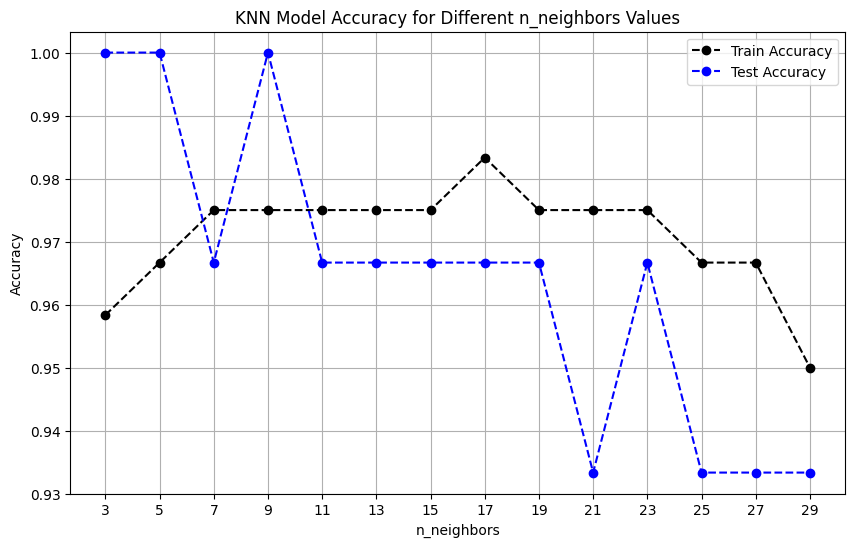

In [40]:
# k값 범위 설정
k_values = list(range(3, 30, 2)) #3, 5, 7, .., 29
accuracy_scores_tr = []
accuracy_scores_te = []

# 각 k값에 대해 모델 학습 및 정확도 계산
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train) #train 예측
    y_pred_test = knn.predict(X_test) #test 예측
    accuracy1 = metrics.accuracy_score(y_train, y_pred_train) #train 비교
    accuracy2 = metrics.accuracy_score(y_test, y_pred_test) #test 비교
    accuracy_scores_tr.append(accuracy1)
    accuracy_scores_te.append(accuracy2)


# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_tr, marker='o', linestyle='--', color='black', label='Train Accuracy')
plt.plot(k_values, accuracy_scores_te, marker='o', linestyle='--', color='b', label='Test Accuracy')
plt.title('KNN Model Accuracy for Different n_neighbors Values')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend(loc='best')
plt.grid(True)
plt.show()

KNN에서 데이터 개수가 작을 때 사용하고 k개수 50,30개 (10%이하) 정도로 사용됨
- 2000개 넘어가면 다른 거 사용

test 데이터 모두 0.9이상의 높은 정확도를 보이지만, 이 중에서 9인 경우에 값이 높게 측정

In [44]:
# knn모델 사용 - 최종 n_neighbors=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# 혼동 행렬 결과

y_pred3 = knn.predict(X_test) # 예측 결과
conf_matrix = confusion_matrix(y_test, y_pred3) # 혼동 행렬 계산
conf_matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [45]:
# F1 점수 계산 (정밀도와 재현율의 조화평균)
f1 = f1_score(y_test, y_pred3, average='macro')
print(f"F1 점수: {f1:.4f}")

F1 점수: 1.0000


In [48]:
# model accuracy3
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred3)))

Accuracy: 1.0


행(row) = 실제 클래스 (ground truth) </br>
열(column) = 예측 클래스 (predictions) </br>
- 모두 오차 없이 정확하게 분류됨